In [1]:
import numpy, scipy, matplotlib.pyplot as plt, IPython.display as ipd
import librosa, librosa.display
import pandas as pd

In [93]:
instrumental_format_set_df = pd.read_csv("/Users/fernando/Downloads/4791394/instrumental_format_set.csv", encoding="latin1", sep=";")
beat_annotations_folder = "/Users/fernando/Downloads/4791394/instrumental_format_set/Beat_annotations/"

In [94]:
instrumental_format_set_df.head()

,Filename,Title,Genre,Composer,Sample rate,Channels,Bit depth,Start (sec),Duration (sec),Original file,...,Noise at 128 Hz,Mono,Channel correlation,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33
0,if_0001.wav,Blanquita,pasillo,Luis A. Calvo,96000.0,2.0,24.0,0.0,31.0,"Cassete001, lado A, 06 blanquita (pasillo).wav",...,0.0,0.0,"0,77",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,if_0002.wav,Gladys,pasillo,Mario Martínez,96000.0,2.0,24.0,0.0,24.0,"Cassete001, lado A, 05 Gladys (guabina).wav",...,0.0,0.0,"0,767",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,if_0003.wav,el cucarrón,pasillo,Luis Uribe Bueno,96000.0,2.0,24.0,0.0,15.0,"Cassete002, lado A, if_06.wav",...,0.0,0.0,"0,898",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,if_0004.wav,Pulgarcito,bambuco,José Luis Martínez,96000.0,2.0,24.0,0.0,17.0,"Cassete001, lado A, 08 Pulgarcito (bambuco).wav",...,0.0,0.0,"0,713",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,if_0005.wav,Baby,pasillo,Hernando Sinisterra,96000.0,2.0,24.0,0.0,19.0,"Cassete001, lado B, 02 Baby (pasillo).wav",...,0.0,0.0,"0,857",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:
instrumental_format_set_df[[
    "Filename",
    "Title",
    "Nr. of instruments",
    "Guitar",
    "Bandola",
    "Tiple",
    "Bass",
    "Female voice",
    "Male voice",
    "Percussion",
    "Tempo"
]]

,Filename,Title,Nr. of instruments,Guitar,Bandola,Tiple,Bass,Female voice,Male voice,Percussion,Tempo
0,if_0001.wav,Blanquita,3.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,90.0
1,if_0002.wav,Gladys,3.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,116.0
2,if_0003.wav,el cucarrón,3.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,127.0
3,if_0004.wav,Pulgarcito,3.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,144.0
4,if_0005.wav,Baby,3.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,150.0
...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
285,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
287,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [96]:
dataset_files_directory = "/Users/fernando/Downloads/4791394/instrumental_format_set/Audio/"
audio_filename = "if_0003.wav"
audio_filepath = dataset_files_directory + audio_filename
x, sr = librosa.load(audio_filepath)
ipd.Audio(x, rate=sr)

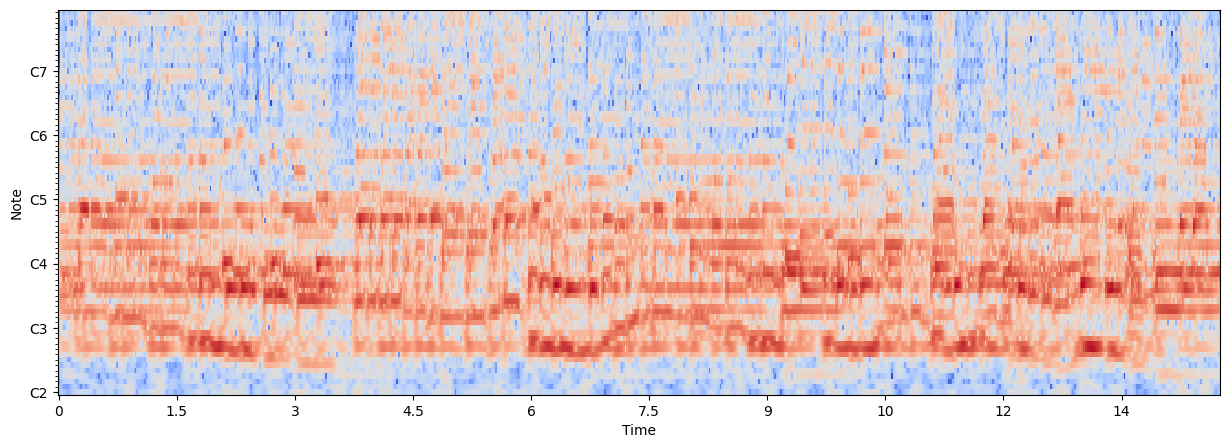

In [97]:
fmin = librosa.midi_to_hz(36)
hop_length = 512
C = librosa.cqt(x, sr=sr, fmin=fmin, n_bins=72, hop_length=hop_length)

logC = librosa.amplitude_to_db(numpy.abs(C))
plt.figure(figsize=(15, 5))
librosa.display.specshow(logC, sr=sr, x_axis='time', y_axis='cqt_note', fmin=fmin, cmap='coolwarm')

In [98]:
fmin

np.float64(65.40639132514966)

# Chroma sfft

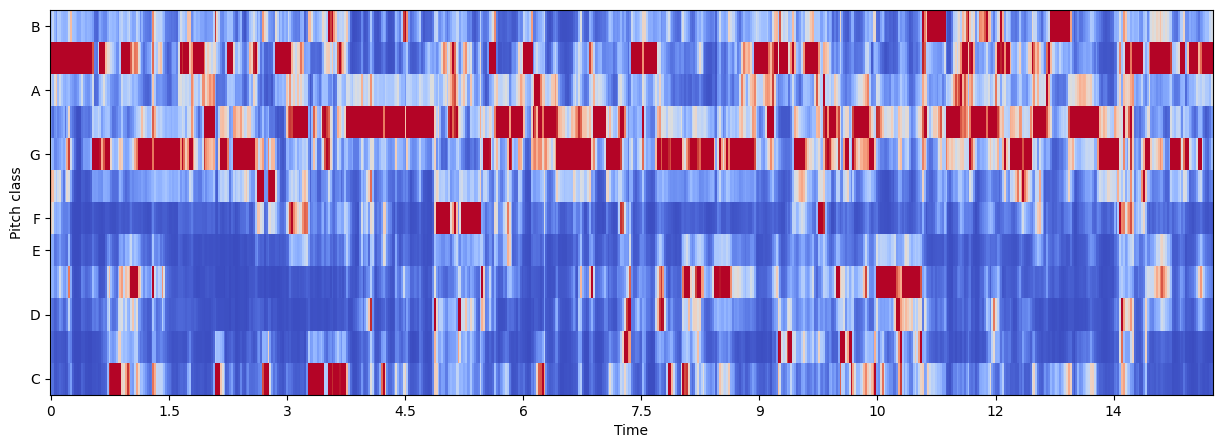

In [99]:
chromagram = librosa.feature.chroma_stft(y=x, sr=sr, hop_length=hop_length)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')

# Chroma CQT

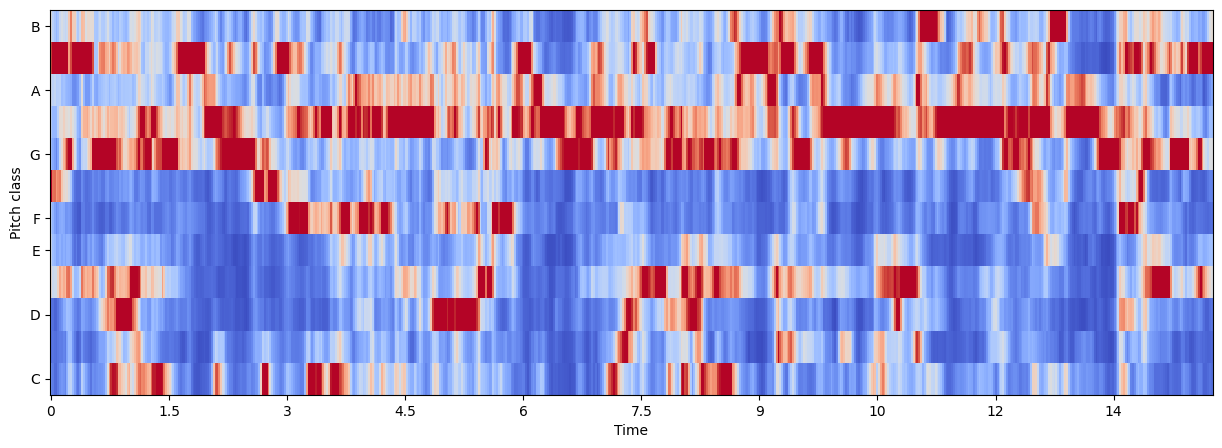

In [100]:
chromagram = librosa.feature.chroma_cqt(y=x, sr=sr, hop_length=hop_length)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')

(0.0, 1337.0)

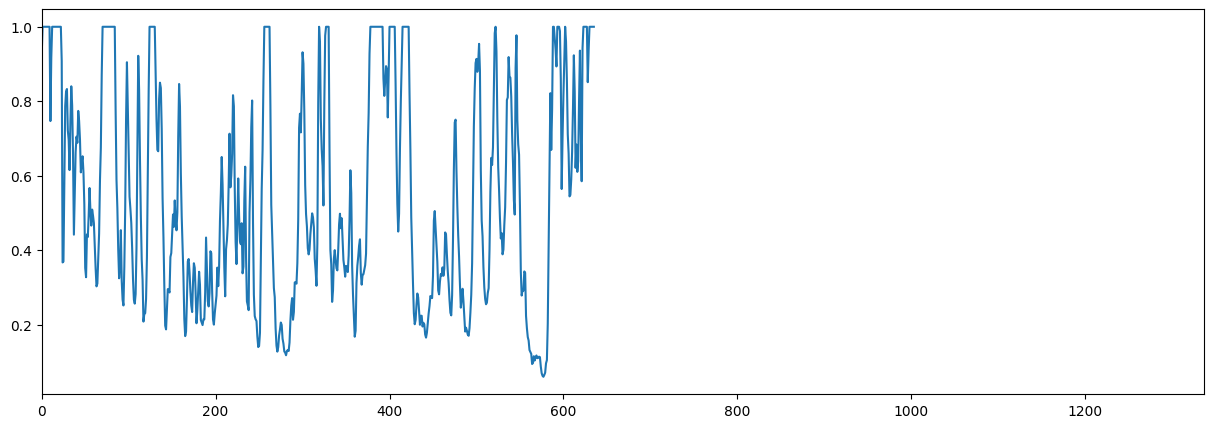

In [101]:
plt.figure(figsize=(15, 5))
plt.plot(chromagram[10])
plt.xlim(0, 1337)

In [102]:
1337 * 512 / sr

31.045079365079363

# Chrome Cens

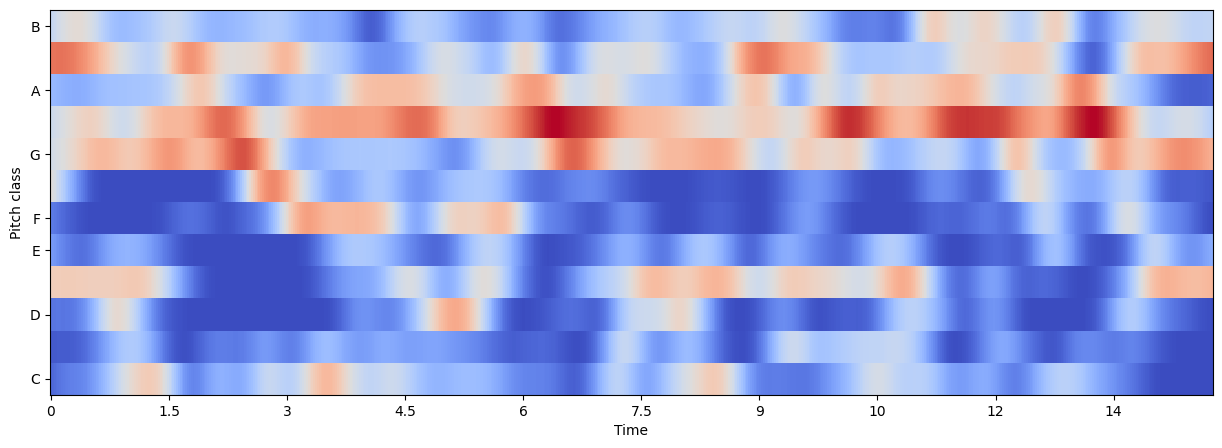

In [103]:
chromagram = librosa.feature.chroma_cens(y=x, sr=sr, hop_length=hop_length)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')

In [104]:
def load_beat_annotations(track_filename, beat_annotations_folder):
    beat_annotations_filename = track_filename.replace(".wav", ".txt")
    beat_annotations_filepath = beat_annotations_folder + beat_annotations_filename
    # load txt file, every line is a beat in seconds
    beats_times = []
    with open(beat_annotations_filepath, "r") as f:
        for line in f:
            beats_times.append(float(line.strip()))

    return beats_times

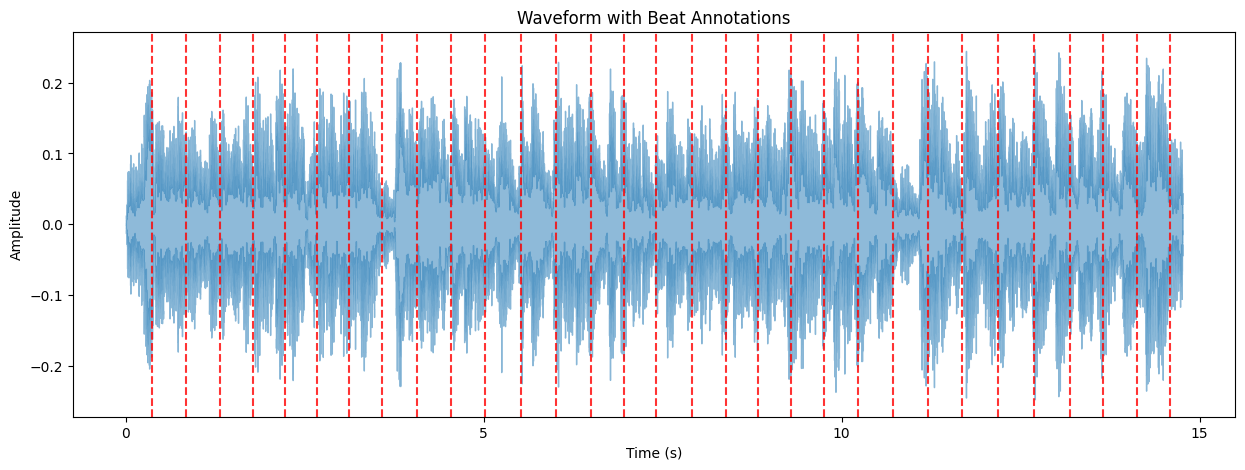

In [105]:
plt.figure(figsize=(15, 5))
librosa.display.waveshow(x, sr=sr, alpha=0.5)
beats_timestamps = load_beat_annotations(audio_filename, beat_annotations_folder)
for beat in beats_timestamps:
    plt.axvline(x=beat, color='r', linestyle='--', alpha=0.8)
plt.title("Waveform with Beat Annotations")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()


In [106]:
def sonify_beats(beats_timestamps, original_audio, sr):
    """
    Returns a numpy array with the sound of a sine wave at each beat, same length as the input.
    """
    # Shorter sine wave to play at each beat
    sine_wave = numpy.sin(2 * numpy.pi * 2000 * numpy.linspace(0, 0.05, int(sr * 0.05)))  # 0.05 seconds duration

    # Create an empty array with the same length as the original audio
    sonified_audio = numpy.zeros_like(original_audio)

    # Add the sine wave at each beat timestamp
    for beat in beats_timestamps:
        start_sample = int(beat * sr)
        end_sample = start_sample + len(sine_wave)
        if end_sample < len(sonified_audio):
            sonified_audio[start_sample:end_sample] += sine_wave

    # Normalize the audio to prevent clipping
    sonified_audio = numpy.clip(sonified_audio, -1.0, 1.0)

    return sonified_audio


In [107]:
sonified_beats = sonify_beats(beats_timestamps, x, sr)
ipd.Audio(x + 0.25 * sonified_beats , rate=sr)

In [108]:
beats_timestamps[0]

0.373333333

In [109]:
sr

22050

In [110]:
beats_timestamps[0] * sr

8231.99999265

In [111]:
hop_length = 512
beats_timestamps = load_beat_annotations(audio_filename, beat_annotations_folder)
chromagram = librosa.feature.chroma_cqt(y=x, sr=sr, hop_length=hop_length)

# given the cqt chronogram for the audio, go through the beats timestamps and get chroma average values at each beat

In [112]:
import numpy as np

def compute_beat_chroma(chromagram, beats_timestamps, sr, hop_length):
    """
    Computes the average chroma between consecutive beat timestamps.
    
    Parameters
    ----------
    chromagram : np.ndarray
        2D array of shape (12, frames) from librosa.feature.chroma_cqt (or another chroma function).
    beats_timestamps : list of float
        List of beat times (in seconds).
    sr : int
        Sampling rate of the audio.
    hop_length : int
        The hop length used to compute the chromagram.
    
    Returns
    -------
    pd.DataFrame
        A DataFrame where each row represents the average chroma between two consecutive beats.
        The columns include the start/end times of each beat segment, and the 12 mean chroma values.
    """
    # Convert beat times to frame indices
    beat_frames = librosa.time_to_frames(beats_timestamps, sr=sr, hop_length=hop_length)

    # Prepare a list to store results
    results = []

    # Loop through each pair of consecutive beats
    for i in range(len(beat_frames) - 1):
        start_frame = beat_frames[i]
        end_frame   = beat_frames[i + 1]

        # Safeguard against out-of-bounds if last frame goes past chromagram length
        end_frame = min(end_frame, chromagram.shape[1])

        # Slice the chromagram for frames between these two beats
        segment = chromagram[:, start_frame:end_frame]

        # Compute the average across all frames in this segment (axis=1 => across columns)
        mean_chroma = np.mean(segment, axis=1)

        # Store result
        results.append({
            "beat_start_time": beats_timestamps[i],
            "beat_end_time": beats_timestamps[i + 1],
            **{f"chroma_{c}": mean_chroma[c] for c in range(12)}
        })

    # Convert to DataFrame for convenience
    df = pd.DataFrame(results)
    return df

# Usage example:
hop_length = 512
beats_timestamps = load_beat_annotations(audio_filename, beat_annotations_folder)
chromagram = librosa.feature.chroma_cqt(y=x, sr=sr, hop_length=hop_length)

beat_chroma_df = compute_beat_chroma(chromagram, beats_timestamps, sr, hop_length)
beat_chroma_df.head()

,beat_start_time,beat_end_time,chroma_0,chroma_1,chroma_2,chroma_3,chroma_4,chroma_5,chroma_6,chroma_7,chroma_8,chroma_9,chroma_10,chroma_11
0,0.373333,0.842667,0.394351,0.244817,0.454718,0.686548,0.258088,0.130718,0.172102,0.819305,0.636961,0.338558,0.803954,0.467829
1,0.842667,1.312000,0.707151,0.495790,0.691337,0.755998,0.374293,0.182361,0.212519,0.831178,0.714209,0.418081,0.578780,0.436098
2,1.312000,1.781333,0.560439,0.163119,0.214923,0.419775,0.232284,0.182866,0.188399,0.854167,0.652419,0.417106,0.638803,0.437278
3,1.781333,2.218667,0.323741,0.194849,0.124757,0.117318,0.131565,0.147641,0.156583,0.594485,0.794648,0.606373,0.697200,0.270402
4,2.218667,2.666667,0.197095,0.172551,0.113236,0.111807,0.107534,0.175798,0.337856,0.969139,0.745659,0.298988,0.551412,0.308622


In [113]:
import seaborn as sns

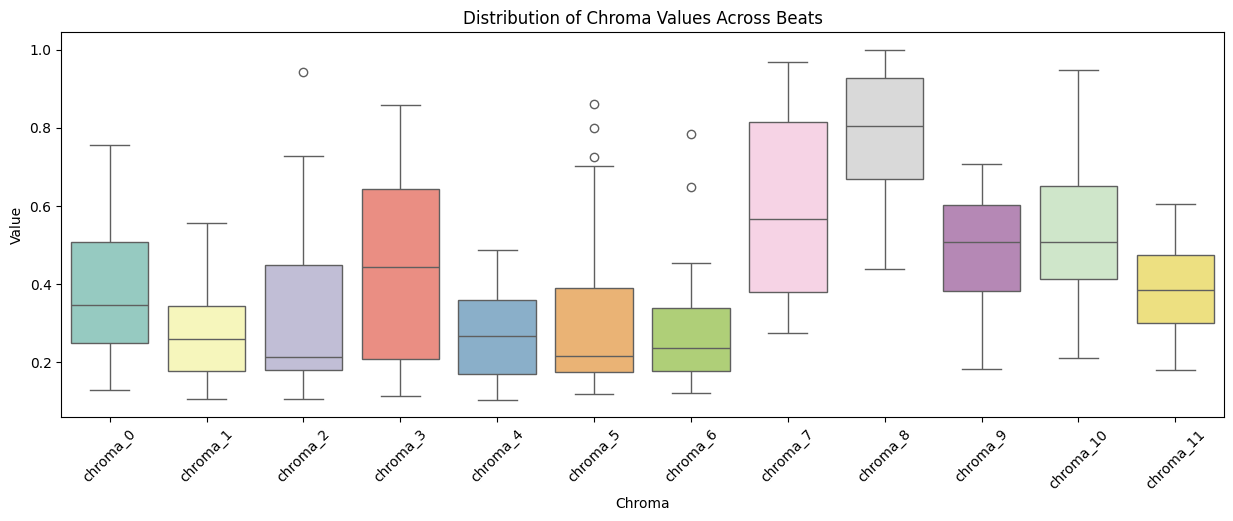

In [114]:
# plot distribution of chroma for all beats
plt.figure(figsize=(15, 5))
sns.boxplot(data=beat_chroma_df.iloc[:, 2:], palette="Set3")
plt.title("Distribution of Chroma Values Across Beats")
plt.xlabel("Chroma")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.show()

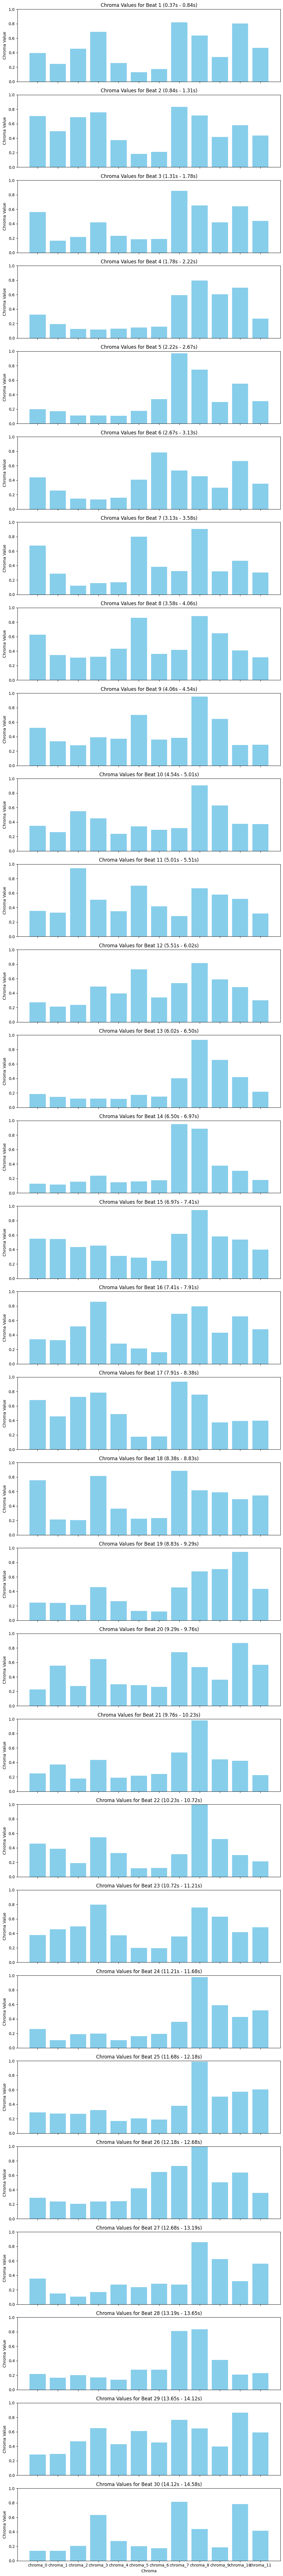

In [115]:
import matplotlib.pyplot as plt

def plot_chroma_bars(beat_chroma_df, n=5):
    """
    Plots bar charts of chroma values for the first n beats.

    Parameters
    ----------
    beat_chroma_df : pd.DataFrame
        DataFrame containing chroma values for each beat.
    n : int
        Number of beats to plot.
    """
    # Limit to the first n beats
    n = min(n, len(beat_chroma_df))
    chroma_columns = [col for col in beat_chroma_df.columns if col.startswith("chroma_")]

    # Create subplots
    fig, axes = plt.subplots(n, 1, figsize=(10, 3 * n), sharex=True)
    if n == 1:
        axes = [axes]  # Ensure axes is iterable for a single subplot

    for i in range(n):
        beat_data = beat_chroma_df.iloc[i]
        axes[i].bar(chroma_columns, beat_data[chroma_columns], color="skyblue")
        axes[i].set_title(f"Chroma Values for Beat {i + 1} ({beat_data['beat_start_time']:.2f}s - {beat_data['beat_end_time']:.2f}s)")
        axes[i].set_ylabel("Chroma Value")
        axes[i].set_ylim(0, 1)  # Adjust based on expected chroma value range

    plt.xlabel("Chroma")
    plt.tight_layout()
    plt.show()

# Usage example:
plot_chroma_bars(beat_chroma_df, n=47)

In [116]:
len(beats_timestamps)

31